<a href="https://colab.research.google.com/github/Adrianus-Bagas/Heart_Disease_Prediction/blob/main/Hate_Speech_Detection_(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Ujaran Kebencian Menggunakan Metode Naive Bayes, Decision Tree, Logistic Regression, Support Vector Machine, dan Artificial Neural Network

## 1. Import beberapa libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Memuat data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/project 4.csv')
df

,Unnamed: 0,Label,Tweet,hasil_praproses
0,0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,spardaxyz fadli zon mendagri nonaktif ahok gub...
1,1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,baguscondromowo luka aksi rangka penjara ahok ...
2,2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi gurbernur keras perempuan bukti foto bar...
3,3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",ahmad dhani puas debat pilkada jalan bekas ungkap
4,4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,lisdaulay waspada ktp palsukawal pilkada
...,...,...,...,...
2695,2724,HS,Yagimanasih anjir gue dirumah doang dari pagi ...,yagimanasih anjir rumah doang pagi gangerti ar...
2696,2725,Non_HS,Yah sekian pandangan awam dari saya wkwwk seka...,yah sekian pandang awam wkwwk lg cuman pandang...
2697,2726,HS,yang butuh memek hubungi rp haneul terdekat',butuh memek hubung rp haneul dekat
2698,2727,HS,Yang sabar gua mah punya adek2 kunyuk yg bau k...,sabar gua mah adek kunyuk yg bau kek sempak kuda


Keterangan Label
1. Non_HS = Baik
2. HS = Buruk

# 4. Model

In [ ]:
X = df['hasil_praproses']
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df

,Unnamed: 0,Label,Tweet,hasil_praproses
0,0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,spardaxyz fadli zon mendagri nonaktif ahok gub...
1,1,0,RT @baguscondromowo: Mereka terus melukai aksi...,baguscondromowo luka aksi rangka penjara ahok ...
2,2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi gurbernur keras perempuan bukti foto bar...
3,3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",ahmad dhani puas debat pilkada jalan bekas ungkap
4,4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,lisdaulay waspada ktp palsukawal pilkada
...,...,...,...,...
2695,2724,1,Yagimanasih anjir gue dirumah doang dari pagi ...,yagimanasih anjir rumah doang pagi gangerti ar...
2696,2725,0,Yah sekian pandangan awam dari saya wkwwk seka...,yah sekian pandang awam wkwwk lg cuman pandang...
2697,2726,1,yang butuh memek hubungi rp haneul terdekat',butuh memek hubung rp haneul dekat
2698,2727,1,Yang sabar gua mah punya adek2 kunyuk yg bau k...,sabar gua mah adek kunyuk yg bau kek sempak kuda


In [ ]:
Y = df["Label"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
2695    1
2696    0
2697    1
2698    1
2699    1
Name: Label, Length: 2700, dtype: int64

Catatan
0 = Non_HS
1 = HS

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X).toarray()
tfidf_vector.shape

(2700, 7678)

In [ ]:
print(df['Label'].value_counts())

1    1935
0     765
Name: Label, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
tfidf_vector, Y = sampler.fit_resample(tfidf_vector, Y)
tfidf_vector.shape

(3870, 7678)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_vector, Y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
X_train.shape

(3096, 7678)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.96156330749354
0.9082687338501292


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

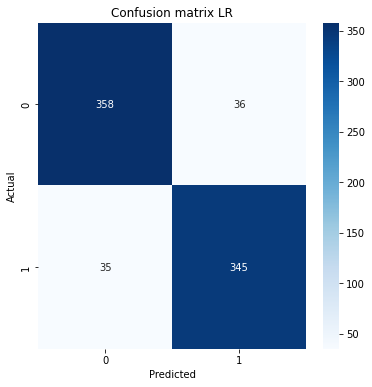

In [ ]:
print_conf(Y_test, y_pred_lr, [0, 1], title="Confusion matrix LR")